Simple Crime Statistics
----------------------

**Updating the MCCA data** 

When we finished our last session, I left you with a challenge -- see if you can get the data into shape from the Major Cities Chiefs Association for 2016-2017, and update our analysis. The original report that generated the CSV we used for 2015-2016 [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_data_midyear_20162015.pdf). The updated version for 2016-2017 [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_report_2017_and_2016_midyear_07312017_update.pdf). I asked that you grab the new file and see what you could do with it. I mentioned that a program like [Tabula](http://tabula.technology/) can be your friend when pulling data from tables and converting it to  more usable CSV files. How did you do? Let's review this exercise briefly, as you will have to do this kind of thing a lot. A lot. 

First, before we try to do anything fancy, what can you tell me about the two reports? Just look at the PDF's for a second and jot down some conclusions. First think about the data and then think about its "structure" -- how is it organized? How are things labled? If we want to combine the two data sets, this kind of ovservation is important.

**Put your observations here**



Now, let's be a little more systematic. I've gone to the trouble of creating CSVs from both PDFs. You can download
[MCCA 2015-2016 here](https://github.com/cocteau/D4D/raw/master/data/mcca2016.csv) and 
[MCCA 2016-2017 here](https://github.com/cocteau/D4D/raw/master/data/mcca2017.csv). Download each and put them in the folder where you put this notebook file. We can then read them in and have a look.

In [1]:
m1 = read.csv("https://github.com/cocteau/D4D/raw/master/data/mcca2016.csv",as.is=TRUE)
m2 = read.csv("https://github.com/cocteau/D4D/raw/master/data/mcca2017.csv",as.is=TRUE)

head(m1,10)
head(m2,10)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA
Arlington PD,13,4,123,117,245,248,668,600,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161
Aurora PD,10,7,127,149,287,205,390,317,18,15
Austin PD,12,9,328,387,516,446,1114,942,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18
Baltimore PD,137,144,137,141,2373,2041,2344,2285,318,282
Boston PD,22,13,116,98,659,661,1269,1399,93,100
Charlotte-Mecklenburg PD,25,27,144,140,912,770,2080,1658,179,109
Chicago PD,316,211,677,643,5176,4050,2751,2298,1321,875


agency,hom17,hom16,rap17,rap16,rob17,rob16,agg17,agg16,non17,non16
Albuquerque PD,32,32,218,193,1310,847,1583,1825,59,40
Atlanta PD,37,56,115,73,674,933,973,1032,234,194
Aurora PD,18,10,178,201,351,287,549,472,33,21
Austin PD,11,15,338,359,482,510,1128,1138,NA,NA
Baltimore County PD,19,16,159,151,808,691,1573,1236,16,20
Baltimore PD,170,137,158,143,2797,2425,2823,2413,312,318
Boston PD,20,22,122,129,663,698,1281,1381,111,93
Charlotte-Mecklenburg PD,47,22,165,138,983,911,1981,2078,124,179
Chicago PD,328,324,804,819,5388,5164,7485,7504,1371,1597
Cincinnati PD,33,33,136,132,593,574,402,349,168,158


In [21]:
dim(m1)
dim(m2)

[1] 62 11

[1] 62 11

Any new observations?

What we'd like to do next is "join" the two data sets. We are going to use the agency name as our "key" for this operation. That is, we want to take all the crime data for Austin, say, and create one long row that has both the 2016-2017 data as well as the 2015-2016 data. The libary dplyr comes to our rescue again with another verb. There are several kinds of "joins" that we can do when bringing the data from two tables together. 

We know, for example, that the two MCCA data sets include slightly different cities. So, how do we handle that? Do we view the current data set as our master, in some sense, and just add whatever data we can from the previous year, ignoring all the cities in 2015-2016 that don't appear in 2016-2017? Do we do it the other way? Do we only include cities that are part of both data sets? That are part of either data set? You can read about the different flavors of "join" by asking R for help.

In [10]:
library(dplyr)
library(ggplot2)

In [11]:
?join

In this case, I think we want a "full join," meaning we keep all the data and just fill in with missing values (NA's) data for cities that occur in one year's report but not the other. Here's what we get. 

In [12]:
mcca <- full_join(m1,m2,by="agency")
head(mcca)

agency,hom16.x,hom15,rap16.x,rap15,rob16.x,rob15,agg16.x,agg15,non16.x,non15,hom17,hom16.y,rap17,rap16.y,rob17,rob16.y,agg17,agg16.y,non17,non16.y
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,32,32,218,193,1310,847,1583,1825,59,40
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,37,56,115,73,674,933,973,1032,234,194
Aurora PD,10,7,127,149,287,205,390,317,18,15,18,10,178,201,351,287,549,472,33,21
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,11,15,338,359,482,510,1128,1138,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,19,16,159,151,808,691,1573,1236,16,20


Since we had columns named "hom16" in both data sets, R added a suffix to each to disambiguate them. I'm not wild about `.x` and `.y` so we can specify something different using the argument "suffix" to the `full_join()` command. What happens now?

In [13]:
mcca = full_join(m1,m2,by="agency",suffix=c("a","b"))
head(mcca)

agency,hom16a,hom15,rap16a,rap15,rob16a,rob15,agg16a,agg15,non16a,non15,hom17,hom16b,rap17,rap16b,rob17,rob16b,agg17,agg16b,non17,non16b
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,32,32,218,193,1310,847,1583,1825,59,40
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,37,56,115,73,674,933,973,1032,234,194
Aurora PD,10,7,127,149,287,205,390,317,18,15,18,10,178,201,351,287,549,472,33,21
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,11,15,338,359,482,510,1128,1138,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,19,16,159,151,808,691,1573,1236,16,20


We use the `options()` command to control the way R output appears in the notebook. We have used this already when resizing our histogram plots. The `options()` call below lets us show a few more rows and columns of our data set, replacing the `...` we see in the output above.

In [14]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)
head(mcca)

agency,hom16a,hom15,rap16a,rap15,rob16a,rob15,agg16a,agg15,non16a,non15,hom17,hom16b,rap17,rap16b,rob17,rob16b,agg17,agg16b,non17,non16b
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,32,32,218,193,1310,847,1583,1825,59,40
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,37,56,115,73,674,933,973,1032,234,194
Aurora PD,10,7,127,149,287,205,390,317,18,15,18,10,178,201,351,287,549,472,33,21
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,11,15,338,359,482,510,1128,1138,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,19,16,159,151,808,691,1573,1236,16,20


Mostly for practice, let's now just look at the homicide rate. When the MCCA data came out in 2016, it was during the election cycle and candidates used them to argue about whether crime was on the rise or not. Journalistic organizations fed into this. [Here is an article from Breitbart](http://www.breitbart.com/big-government/2016/07/26/survey-violent-crime-major-cities/) and [here is one from the New York Times](https://www.nytimes.com/2016/05/14/us/murder-rates-cities-fbi.html). Remember from last time that crime statistics can be extremely variable from year to year. 

What does the current data say about our crime rate? Going up? Down? The `dplyr` command `select()` chooses which columns from a data frame to keep. Here we skinny things down just to homicides.

In [15]:
homicides <- select(mcca,agency,hom17,hom16b,hom16a,hom15)
homicides

agency,hom17,hom16b,hom16a,hom15
Albuquerque PD,32,32,34,25
Arlington PD,NA,NA,13,4
Atlanta PD,37,56,57,45
Aurora PD,18,10,10,7
Austin PD,11,15,12,9
Baltimore County PD,19,16,16,14
Baltimore PD,170,137,137,144
Boston PD,20,22,22,13
Charlotte-Mecklenburg PD,47,22,25,27
Chicago PD,328,324,316,211


One thing you'll notice right away is that the counts from 2016 don't match between the data sets. Why? You also see which cities were in and out of the previous file. Why? 

What do you think about crime? Homicides on the rise? On the decline? Let's be more systematic. Let's filter() the data so that we keep the rows where the homicide count increased from 2015 to 2016 and from 2016 to 2017. How many cities are there? 

In [16]:
filter(homicides,hom17-hom16b>0,hom16a-hom15>0)

agency,hom17,hom16b,hom16a,hom15
Aurora PD,18,10,10,7
Baltimore County PD,19,16,16,14
Chicago PD,328,324,316,211
Fort Worth PD,39,35,34,28
Los Angeles PD,141,135,134,129
Louisville Metro PD,66,53,54,35
Nashville PD,55,35,34,31
Oklahoma City PD 2,35,30,19,14
Philadelphia PD,156,122,122,115
San Francisco PD,34,26,26,24


In [17]:
filter(homicides,hom17-hom16b<=0,hom16a-hom15<=0)

agency,hom17,hom16b,hom16a,hom15
Cincinnati PD,33,33,35,41
Milwaukee PD,55,55,54,73
Montgomery Co PD,9,9,8,15
Salt Lake City PD,2,4,3,4


So that means there are 11 cities that saw year-on-year increases, four with decreases and the remaining 40 or so switched from up to down or down to up. So let's look back at what was written in, say, the Brietbart article.

>“The biggest take away is that even though there is an increase in several violent crimes a few cities (Chicago, Phoenix, Las Vegas, Dallas, LA County, Louisville, San Antonio) account for much of the overall increase,” Darrel Stephens, the executive director of the Major Cities Chiefs Association explained in an email to Breitbart News, “Of course the tragic mass shooting in Orlando accounts for 49 of the homicides.
<br><br>
Of the 51 major cities’ police departments’, 29 reported increases in the number of homicides, including: Arlington PD, Atlanta PD, Aurora PD, Austin PD, Baltimore County PD, Boston PD, Chicago PD, Dallas PD, Forth Worth PD, Jacksonville Sheriff’s Dept., Las Vegas Metropolitan PD, Long Beach PD, Los Angeles County Sheriff’s Dept., Los Angeles PD, Louisville Metro PD, Nashville PD, Newark PD, Oklahoma City PD, Orlando PD, Philadelphia PD, Phoenix PD, Pittsburgh PD, Prince George’s County PD, San Antonio PD, San Diego PD, San Jose PD, Seattle PD, Tulsa PD, Washington DC (Metro PD).

Chicago had an increase in the 2016-2017 report but very small one compared to the 2015-2016 number. Phoenix dropped in the recent report, as did Las Vegas, Dallas, LA County, and San Antonio. Nearly all of the cities cited by the MCCA executive director. Let's look at the percentage increase again and then compare 2016-2017 to 2015-2016. There are a lot of ways to do this, but let's keep it simple with a histogram. We'll use mutate() to create a new version of "homicides" that has the percentage change as columns.

What do you see?

In [20]:
options(repr.plot.width=8, repr.plot.height=6)

homicides <- mutate(homicides,hom1716=(hom17-hom16b)/hom16b,hom1615=(hom16a-hom15)/hom15,diff=hom1716-hom1615)
homicides

agency,hom17,hom16b,hom16a,hom15,hom1716,hom1615,diff
Albuquerque PD,32,32,34,25,0.00000000,0.36000000,-0.360000000
Arlington PD,NA,NA,13,4,NA,2.25000000,NA
Atlanta PD,37,56,57,45,-0.33928571,0.26666667,-0.605952381
Aurora PD,18,10,10,7,0.80000000,0.42857143,0.371428571
Austin PD,11,15,12,9,-0.26666667,0.33333333,-0.600000000
Baltimore County PD,19,16,16,14,0.18750000,0.14285714,0.044642857
Baltimore PD,170,137,137,144,0.24087591,-0.04861111,0.289487024
Boston PD,20,22,22,13,-0.09090909,0.69230769,-0.783216783
Charlotte-Mecklenburg PD,47,22,25,27,1.13636364,-0.07407407,1.210437710
Chicago PD,328,324,316,211,0.01234568,0.49763033,-0.485284653


The big drop?

In [19]:
filter(homicides,diff< -6)

agency,hom17,hom16b,hom16a,hom15,hom1716,hom1615,diff
Orlando PD 3,14,67,65,8,-0.7910448,7.125,-7.916045


This goes to explain also why criminologists prefer to look at longer time periods than a single year. One event can completely skew the statistics and a blind analysis might mistake it for a trend.

In [ ]:
hist(homicides$hom1716-homicides$hom1615,xlim=c(-3,3),main="Difference in percent change")

**Uniform Crime Reporting - The first data from the Trump Administration**

We finished the last session by looking at data from the [Uniform Crime Reporting program](https://ucr.fbi.gov/) from the FBI. This aggregates crime statistics from local police and law enforcement agencies across the country. [The first report under the Trump administration](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016) was released recently and was picked up by various news outlets. The Atlantic had [a long piece](https://www.theatlantic.com/politics/archive/2017/09/americas-uneven-crime-spike/541023/) examining where crime increases are happening. Let's start by verifying some of their data. 

For the moment, we'll focus on 2016 data and not try to compare it to 2015 as we did with the MCCA data. Toward that end, the Atlantic states

>Rural, urban, and suburban communities all saw increases in violent crimes in 2016. But they were of varying degrees. Some places, like Houston and Washington, D.C., saw the number of murders either stay roughly the same or slightly decline. Other communities fared worse. Chicago ended 2016 with 762 murders, a whopping 58 percent jump over 2015’s total. Baltimore experienced its second-deadliest year on record with 358 murders, surpassing the previous record set in 2015.

Let's check that out. First, we will read in the data. [I've loaded it here.](https://github.com/cocteau/D4D/raw/master/data/ucr2016.csv)

In [22]:
crime = read.csv("https://github.com/cocteau/D4D/raw/master/data/ucr2016.csv",as.is=TRUE)
head(crime)

State,City,Population,Violent_crime,Murder,Rape,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson
ALABAMA,Abbeville,2608,11,0,1,NA,0,10,51,12,34,5,NA
ALABAMA,Adamsville,4377,19,0,0,NA,10,9,250,33,201,16,NA
ALABAMA,Addison,738,1,0,0,NA,0,1,14,1,11,2,NA
ALABAMA,Alabaster,33040,97,1,2,NA,2,92,488,58,411,19,NA
ALABAMA,Albertville,21525,29,0,5,NA,10,14,721,190,462,69,NA
ALABAMA,Alexander City,14695,277,2,4,NA,14,257,657,123,493,41,NA


In [23]:
tail(crime)

,State,City,Population,Violent_crime,Murder,Rape,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson
9574,WYOMING,Sheridan,17956,17,2,0,NA,1,14,362,54,295,13,2
9575,WYOMING,Sundance,1289,1,0,1,NA,0,0,14,0,14,0,0
9576,WYOMING,Thermopolis,2967,7,1,0,NA,3,3,32,3,28,1,0
9577,WYOMING,Torrington,6676,25,0,0,NA,0,25,99,19,77,3,0
9578,WYOMING,Wheatland,3665,8,0,0,NA,0,8,63,13,47,3,0
9579,WYOMING,Worland,5348,6,0,3,NA,0,3,62,18,43,1,0


One of the functions, or verbs, added in `dplyr` is a special summary function. It helps you tell what kind of variable each column represents. This boils down to qualitative versus quantitative, a fundamental distinction as we get into analysis. Why? The function is called `glimpse()`.

In [24]:
glimpse(crime)

Observations: 9,579
Variables: 14
$ State              <chr> "ALABAMA", "ALABAMA", "ALABAMA", "ALABAMA", "ALA...
$ City               <chr> "Abbeville", "Adamsville", "Addison", "Alabaster...
$ Population         <int> 2608, 4377, 738, 33040, 21525, 14695, 2362, 9071...
$ Violent_crime      <int> 11, 19, 1, 97, 29, 277, 5, 84, 735, 70, 2, 6, 3,...
$ Murder             <int> 0, 0, 0, 1, 0, 2, 0, 1, 7, 1, 0, 0, 0, 0, 0, 1, ...
$ Rape               <int> 1, 0, 0, 2, 5, 4, 0, 6, 39, 11, 0, 1, 0, 1, 1, 1...
$ Rape_legacy        <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Robbery            <int> 0, 10, 0, 2, 10, 14, 0, 6, 87, 3, 0, 0, 0, 0, 0,...
$ Aggravated_assault <int> 10, 9, 1, 92, 14, 257, 5, 71, 602, 55, 2, 5, 3, ...
$ Property_crime     <int> 51, 250, 14, 488, 721, 657, 24, 477, 1712, 511, ...
$ Burglary           <int> 12, 33, 1, 58, 190, 123, 10, 64, 712, 113, 8, 18...
$ Larceny_theft      <int> 34, 201, 11, 411, 462, 493, 14, 397, 888, 366, 1...
$ Vehicle_theft   

In [25]:
dim(crime)

[1] 9579   14

So `glimpse()` tells us that we have 9579 cities in the US reporting data to the the FBI. There are 14 columns, describing the name, state, population and crime statistics for each. Summarize the state names with a simple tabulation. That is, how many times does each state appear in the data set, or, equivalently, how many cities are included in the data set for each state.

In [27]:
summarize(group_by(crime,State),cities=n())

State,cities
ALABAMA,201
ALASKA,27
ARIZONA,60
ARKANSAS,194
CALIFORNIA,461
COLORADO,129
CONNECTICUT,90
DELAWARE,36
DISTRICT OF COLUMBIA,1
FLORIDA,284


In [28]:
filter(crime,State=="PENNSYLVANIA")

State,City,Population,Violent_crime,Murder,Rape,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson
PENNSYLVANIA,"Abington Township, Montgomery County",55623,49,0,5,NA,28,16,1089,84,977,28,3
PENNSYLVANIA,Adamstown,1848,1,0,0,NA,0,1,17,6,11,0,0
PENNSYLVANIA,"Adams Township, Butler County",13531,5,0,1,NA,0,4,46,2,44,0,0
PENNSYLVANIA,Akron,4014,5,0,1,NA,0,4,29,6,23,0,1
PENNSYLVANIA,Albion,1459,7,0,1,NA,0,6,25,12,13,0,1
PENNSYLVANIA,Aldan,4168,7,0,1,NA,1,5,80,7,72,1,1
PENNSYLVANIA,Aleppo Township,1903,0,0,0,NA,0,0,4,0,4,0,0
PENNSYLVANIA,"Allegheny Township, Blair County",6652,29,0,1,NA,1,27,158,1,153,4,2
PENNSYLVANIA,"Allegheny Township, Westmoreland County",8213,7,0,0,NA,2,5,75,17,58,0,0
PENNSYLVANIA,Allentown,120615,552,10,55,NA,274,213,3337,668,2387,282,18


As we have done with the MCCA data, we can pull out columns and summarize them in various ways. Here we just look at the overall count of violent crime in the country for 2016.

In [29]:
summarize(crime,total=sum(Violent_crime,na.rm=TRUE))

total
962912


Recall, the dplyr function `select()` lets us pull a number of them. Here we take City, State, Population and Violent_crime. In the `select()` function we can refer to the names of variables -- all the names are interpeted as coming from the data frame "crime".

In [30]:
head(select(crime,State, City, Population, Violent_crime),25)

State,City,Population,Violent_crime
ALABAMA,Abbeville,2608,11
ALABAMA,Adamsville,4377,19
ALABAMA,Addison,738,1
ALABAMA,Alabaster,33040,97
ALABAMA,Albertville,21525,29
ALABAMA,Alexander City,14695,277
ALABAMA,Aliceville,2362,5
ALABAMA,Andalusia,9071,84
ALABAMA,Anniston,22205,735
ALABAMA,Arab,8334,70


The verb summarise() (Hadley is from NZ and hence the "ise") takes a data frame in, this time "crime" and returns another one, but consisting of summaries. So here we sum up all the violent crime, and in the next cell we sum crime and population across cities.

In [31]:
summarise(crime,Violent_total = sum(Violent_crime,na.rm=TRUE),Population_total = sum(Population,na.rm=TRUE))

Violent_total,Population_total
962912,207570416


This gets interesting when we break the data into parts. Here we group_by() the "State" variable and then compute the summaries. Here are the totals of violent crime and then violent crime and population by state.

In [32]:
summarise(group_by(crime,State),Violent_total = sum(Violent_crime,na.rm=TRUE))

State,Violent_total
ALABAMA,15229
ALASKA,4697
ARIZONA,23856
ARKANSAS,12044
CALIFORNIA,145205
COLORADO,15533
CONNECTICUT,7754
DELAWARE,2359
DISTRICT OF COLUMBIA,7711
FLORIDA,50540


In [33]:
summarise(group_by(crime,State),Violent_total = sum(Violent_crime,na.rm=TRUE),Population_total = sum(Population,na.rm=TRUE))

State,Violent_total,Population_total
ALABAMA,15229,2499649
ALASKA,4697,475023
ARIZONA,23856,5232268
ARKANSAS,12044,1729204
CALIFORNIA,145205,32747075
COLORADO,15533,3671826
CONNECTICUT,7754,2999155
DELAWARE,2359,262570
DISTRICT OF COLUMBIA,7711,681170
FLORIDA,50540,9885328


We can store the output of this operation in a new variable called "state" that we can then examine.

In [34]:
state <- summarise(group_by(crime,State),Violent_total = sum(Violent_crime,na.rm=TRUE),Population_total = sum(Population,na.rm=TRUE))
head(state)

State,Violent_total,Population_total
ALABAMA,15229,2499649
ALASKA,4697,475023
ARIZONA,23856,5232268
ARKANSAS,12044,1729204
CALIFORNIA,145205,32747075
COLORADO,15533,3671826


The obvious thing to do next is introduce a new column. With `dplyr` we can use the verb `mutate()` that takes a data set like "state" and then adds new variables. Here we create a variable called `Violent_per100` to represent the number of violent crimes per 100,000 people in the state. (While this is just a rescaling of the "per capita" number, it does seem a little awkward for some states.)

In [35]:
state <- mutate(state,Violent_per100=100000*Violent_total/Population_total)
state

State,Violent_total,Population_total,Violent_per100
ALABAMA,15229,2499649,609.2455
ALASKA,4697,475023,988.7942
ARIZONA,23856,5232268,455.9399
ARKANSAS,12044,1729204,696.5054
CALIFORNIA,145205,32747075,443.4136
COLORADO,15533,3671826,423.0320
CONNECTICUT,7754,2999155,258.5395
DELAWARE,2359,262570,898.4271
DISTRICT OF COLUMBIA,7711,681170,1132.0228
FLORIDA,50540,9885328,511.2628


This is a little advanced but rather than worry about all the parentheses (passing tables as arguments to functions), we can use a "pipe" that takes the output of one command and uses it as input to the next. So here we take the crime data set, group it by state and the summarize the grouped data set with total population and total violent crime. Finally we take the result and add a new column to the table using mutate(). The whole thing is stored (using ->) in the data frame "state". 

In [ ]:
crime %>%
    group_by(State) %>%
    summarize(Violent_total = sum(Violent_crime,na.rm=TRUE),Population_total = sum(Population,na.rm=TRUE)) %>%
    mutate(Violent_per100=100000*Violent_total/Population_total) -> state

**The most dangerous cities**

States are fine, but there are plenty of stories that come out each year about city-specific crime rates. The typical figure used to compare cities is again the incidents of violent crime per 100,000 people. 

Here we create the per 100,000 figure but for each city...

In [36]:
new_crime <- mutate(select(crime,State,City,Population,Violent_crime),Violent_per100=100000*Violent_crime/Population)
head(new_crime)

State,City,Population,Violent_crime,Violent_per100
ALABAMA,Abbeville,2608,11,421.7791
ALABAMA,Adamsville,4377,19,434.0873
ALABAMA,Addison,738,1,135.5014
ALABAMA,Alabaster,33040,97,293.5835
ALABAMA,Albertville,21525,29,134.7271
ALABAMA,Alexander City,14695,277,1884.9949


... and then have a look.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”

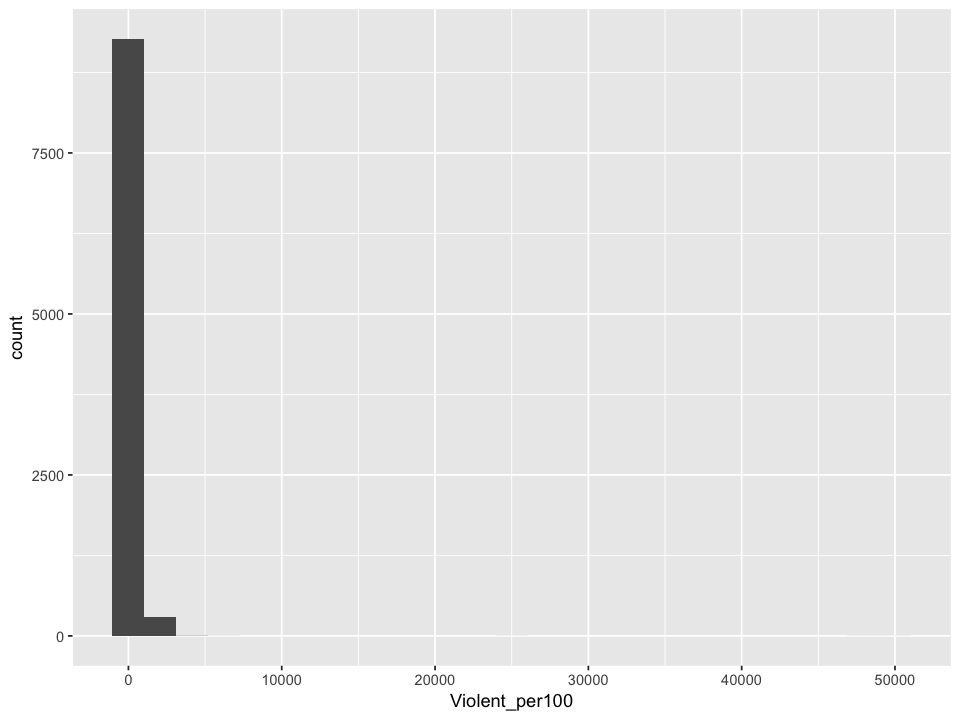

In [37]:
options(repr.plot.width=8, repr.plot.height=6)

ggplot(new_crime,aes(x=Violent_per100))+geom_histogram(bins=25)

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”

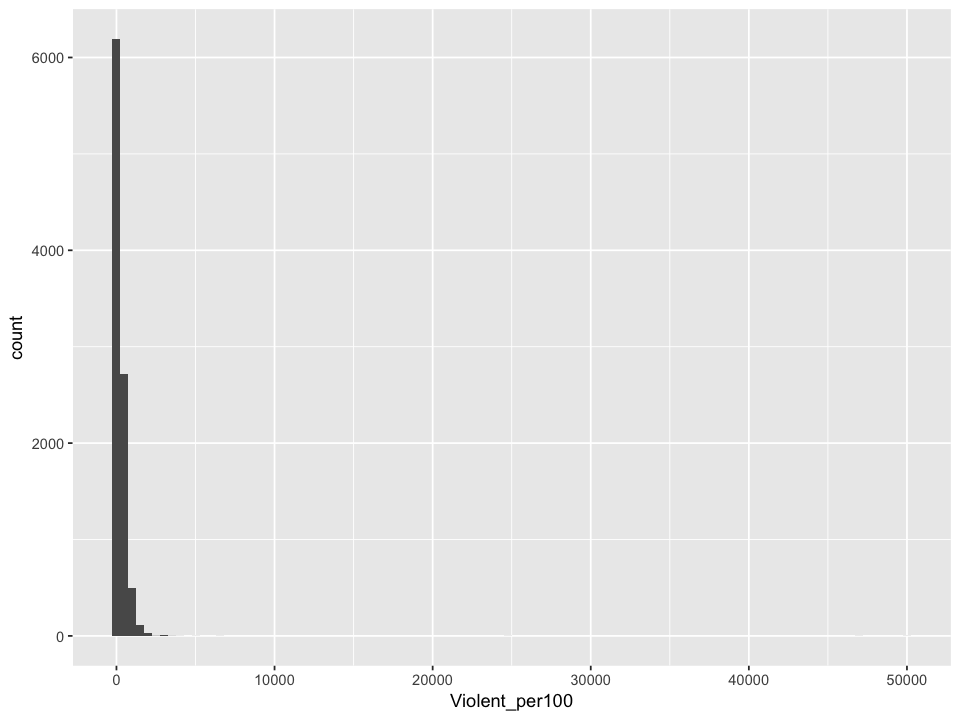

In [38]:
ggplot(new_crime,aes(x=Violent_per100))+geom_histogram(bins=100)

We can sort the table using the verb `arrange().` Descending order makes sense because we want to get the most dangerous places, those with the highest incident rates at the top.

In [39]:
head(arrange(new_crime,desc(Violent_per100)),25)

State,City,Population,Violent_crime,Violent_per100
COLORADO,Lakeside,8,4,50000.000
CALIFORNIA,Industry,204,96,47058.824
CALIFORNIA,Vernon,114,28,24561.404
COLORADO,Black Hawk,126,8,6349.206
COLORADO,Garden City,269,13,4832.714
DELAWARE,Dewey Beach,378,16,4232.804
ALASKA,Kotzebue,3290,111,3373.860
ALABAMA,Anniston,22205,735,3310.065
SOUTH CAROLINA,Estill,1933,60,3103.983
MISSOURI,Wellston,2326,70,3009.458


To remove the small cities, we can `filter()`  the data, giving the same kind of condition we saw with the MCCA data. Here we look for cities with population bigger than 100,000.

In [40]:
new_crime <- filter(new_crime,Population>100000)
head(new_crime)

State,City,Population,Violent_crime,Violent_per100
ALABAMA,Huntsville,192587,1787,927.89233
ALABAMA,Mobile6,249921,1709,683.81609
ALABAMA,Montgomery,199565,1215,608.82419
ALASKA,Anchorage,299097,3422,1144.11044
ARIZONA,Chandler,265922,558,209.83597
ARIZONA,Gilbert,255899,200,78.15583


In [41]:
head(arrange(new_crime,desc(Violent_per100)),25)

State,City,Population,Violent_crime,Violent_per100
MICHIGAN,Detroit,669673,13705,2046.521
MISSOURI,St. Louis,314507,6017,1913.153
TENNESSEE,Memphis,656434,11947,1819.985
MARYLAND,Baltimore,618385,11010,1780.444
ILLINOIS,Rockford,147363,2444,1658.490
MISSOURI,Kansas City,478364,7915,1654.598
OHIO,Cleveland,386227,6299,1630.906
WISCONSIN,Milwaukee,600193,9201,1533.007
ARKANSAS,Little Rock,198800,3044,1531.187
CALIFORNIA,Oakland,424998,6059,1425.654


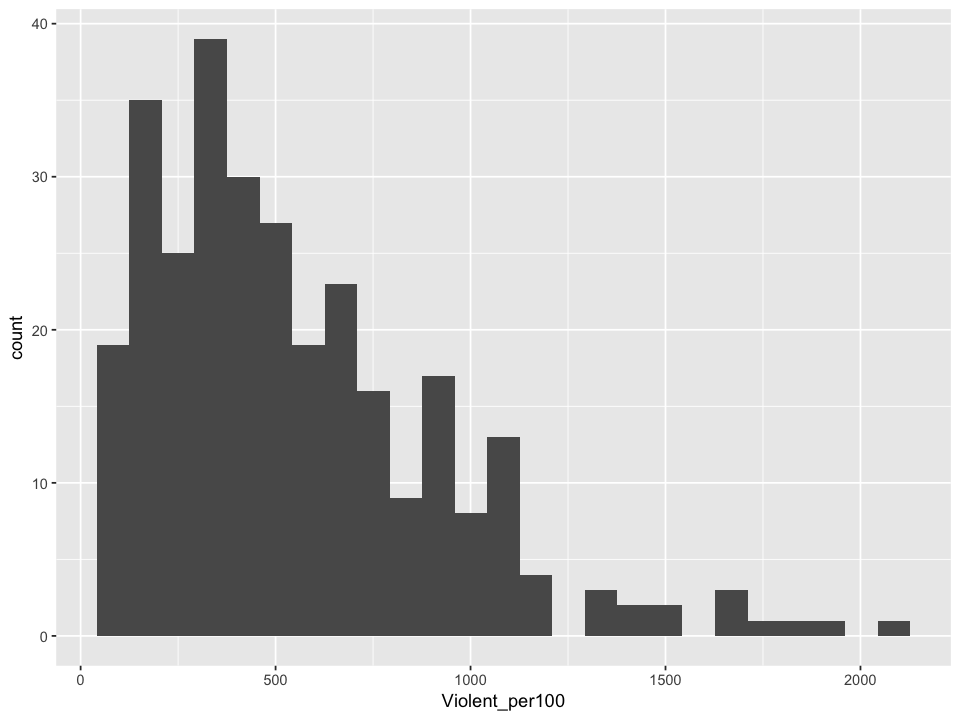

In [43]:
ggplot(new_crime,aes(x=Violent_per100))+geom_histogram(bins=25)

**Comparisons.** For years now, certain cities have remained at the top of this list and many mayors reason that these kinds of rankings are fundamentally inaccurate because they don't compare "apples to apples". Essentially, city boundaries are determined on political grounds and not based on something more generalizable like population density. Some cities are essentially "locked in place," having a small older inner portion of the city that contains very few low-crime suburbs. It is in this older inner core that more crime tends to happen. 

Have a look, for example, at [Baltimore](https://www.trulia.com/real_estate/Baltimore-Maryland/crime/) and [Detroit](https://www.trulia.com/real_estate/Detroit-Michigan/crime/). Compare these to a city like [Jacksonville, Forida.](https://www.trulia.com/real_estate/Jacksonville-Florida/crime/). In the first two cases you see that small, inner core, whereas Jacksonville city limits include relatively crime-free suburbs. It's worth looking at the historical city boundaries of Jacksonville.
<img src=https://photos.smugmug.com/photos/564021382_VSDFJ-M.jpg>

This is just one of several reasons why people try to avoid these kinds of city-to-city comparisons, even though they come out every year. [Even the FBI cautions against using rankings!](https://ucr.fbi.gov/ucr-statistics-their-proper-use).

**Data publication.** As this is the first report of the Trump administration, it's worth asking if things are "business as usual" in the FBI or if something had changed. The FBI itself notes that [things have changed in terms of their publication of statistics this year.](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2016-crime-statistics)

>This publication is a statistical compilation of offense, arrest, and police employee data reported by law enforcement agencies voluntarily participating in the FBI’s Uniform Crime Reporting (UCR) Program. The UCR Program streamlined the 2016 edition by reducing the number of tables from 81 to 29, but still presented the major topics, such as offenses known, clearances, and persons arrested. Limited federal crime, human trafficking, and cargo theft data are also included.

You can see what tables have been removed by [consulting the UCR web site.](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-crosswalk-1) FiveThirtyEight had [a nice article on the changes to data publication.](https://fivethirtyeight.com/features/the-first-fbi-crime-report-issued-under-trump-is-missing-a-ton-of-info/) They report the following.

>In response to queries from FiveThirtyEight about whether the changes to the 2016 report had been made in consultation with the Advisory Policy Board, a spokesman for the UCR responded that the program had “worked with staff from the Office of Public Affairs to review the number of times a user actually viewed the tables on the internet.” When FiveThirtyEight informed a former FBI employee of the process, he said it was abnormal.
<br><br>
“To me it’s shocking that they made these decisions to publish that many fewer tables and they didn’t make the decision with the APB,” James Nolan, who worked at the UCR for five years and now teaches at West Virginia University, told FiveThirtyEight.

It might be worth writing to the FBI and obtaining a copy of the original data from which their tables are derived. Jeff Asher told me that the data collection remains "as is", it's just the tables that are being dropped. This will, he reckons, have a bigger impact on journalists who depend on the tables and are not able to work easily with the raw data (unlike, say criminologists or academics). 

**Other kinds of comparisons.** The UCR data has been used to make a number of other kinds of comparisons. For example, [Breitbart publishes an nearly annual story on shotgun deaths](http://www.breitbart.com/big-government/2017/10/16/fbi-over-four-times-more-people-stabbed-to-death/), observing that more people are stabbed to death with knives than are shot to death with shotguns. [Here is the raw table.](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-12) What do you think? ([Here is what Snopes thinks](https://www.snopes.com/four-times-more-stabbed-than-rifles-any-kind/))

**Filling gaps.** Before we return to more statistical work, one more comment on data that is or isn't there. For many years, the voluntary nature of the UCR meant that we had no good accounting of how many people were killed by police. Eventually, The Guardian and the Washington Post each mounted projects to try to come up with better numbers. [Here is The Guardian's piece "The Counted".](https://www.theguardian.com/us-news/series/counted-us-police-killings) It's worth looking at how they "crowdsourced" the data (partially) and how they relied on partnerships with other organizations that had been using media searches to come up with similar calculations.